In [1]:
import pandas as pd
# Load the  dataset for linear regression
framingham_df = pd.read_csv(r"C:\Users\user-pc\Downloads\framingham.csv")
framingham_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
print(framingham_df.columns)


Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


In [5]:
X_framimngh = framingham_df.drop('TenYearCHD', axis=1)
Y_framimngh = framingham_df['TenYearCHD']
X_train, X_test, Y_train, Y_test = train_test_split(X_framimngh, Y_framimngh, test_size=0.2, random_state=42)

In [8]:
print(framingham_df.isna().sum())

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [9]:
print(framingham_df.dtypes)

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


In [10]:
# Encode any categorical variables if they exist
framingham_df = pd.get_dummies(framingham_df, drop_first=True)


In [11]:
print("Missing values before filling:")
framingham_df.isna()

Missing values before filling:


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4234,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4235,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4236,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [12]:
framingham_df.fillna(framingham_df.mean(), inplace=True)

In [13]:
print("\nMissing values after filling:")
print(framingham_df.isna().sum())


Missing values after filling:
male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [14]:
framingham_df = pd.get_dummies(framingham_df, drop_first=True)

In [15]:
X_framimngh = framingham_df.drop('TenYearCHD', axis=1)
Y_framimngh = framingham_df['TenYearCHD']

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X_framimngh, Y_framimngh, test_size=0.2, random_state=42)

In [17]:
logistic_model = LogisticRegression(max_iter=5000)
logistic_model.fit(X_train, Y_train)


LogisticRegression(max_iter=5000)

In [18]:
Y_pred = logistic_model.predict(X_test)

In [19]:
accuracy = accuracy_score(Y_test, Y_pred) 
print(f"Logistic Regression Accuracy: {accuracy}")

Logistic Regression Accuracy: 0.8573113207547169


In [20]:
import matplotlib.pyplot as plt


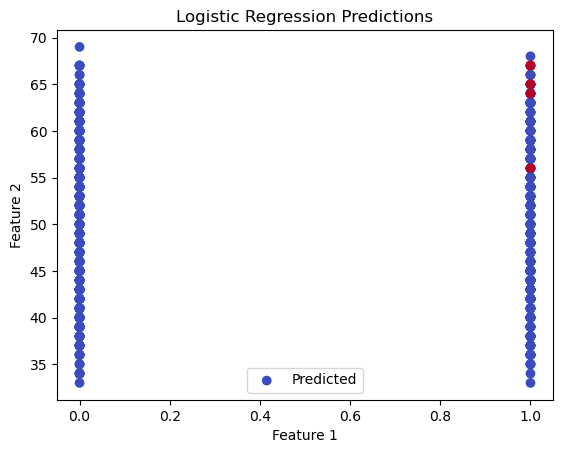

In [21]:
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=Y_pred, cmap='coolwarm', label='Predicted')
plt.xlabel('Feature 1') 
plt.ylabel('Feature 2') 
plt.title('Logistic Regression Predictions') 
plt.legend()
plt.show()